**Part-of-speech (PoS) Tagging**

Implementation of a neural PoS sequence labeling model based on long short-term memory networks to label the words of a given input sentence according to their morphological information.

The basic model must receive as input word level embeddings. 
The advance model in addition to word-level embeddings also uses character-level embeddings.

Code developed by Marcelo Ferrer and Aymen Merchaoui

# Imports and Declarations

In [1]:
# Installs conllu, a python library to parse Universal Dependencies https://pypi.org/project/conllu/
!pip install conllu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# List of constants
# Google drive folder path where the files are located
LOCAL_DRIVE_PATH = '/content/drive/MyDrive/P1/'
# Model to use in the execution
BASIC_CURRENT_MODEL = "Functional_Bi"
# Model to use in the execution
ADVANCED_CURRENT_MODEL = "Functional_Char"
# Use a RNN layer instead of a LSTM layer
USE_RNN = False
# Agregate an extra dense layer of N neurons
DENSE_LEN=128
# Optimizer to use in the compilation of the model
OPTIMIZER = "Adam" #RMSProp, Nadam
# Maximun length of the sequences 
MAX_LEN = 128
# Maximun length of the char sequences 
CHAR_LEN = 18
# Size of the batch to use in the data training
TRAIN_DATA_BATCH_SIZE = 64
# Embedding size
EMBEDDING_SIZE = 128
# Char Embedding size
CHAR_EMBEDDING_SIZE = 20
# Maximun length of the char LSTM units 
CHAR_UNIT_SIZE = 128
# Size of the batch to use in the training
BATCH_SIZE = 64
# Amount of epochs to train
EPOCHS = 10
# Print samples of the data and model
SHOW_SAMPLES = False
# Urls of the languagues
URL_TRAIN_ENG='https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu'
URL_TEST_ENG='https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu'
URL_VAL_ENG='https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-dev.conllu'
URL_TRAIN_SPA='https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-train.conllu'
URL_TEST_SPA='https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-test.conllu'
URL_VAL_SPA='https://raw.githubusercontent.com/UniversalDependencies/UD_Spanish-GSD/master/es_gsd-ud-dev.conllu'
URL_TRAIN_GER='https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-train.conllu'
URL_TEST_GER='https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-test.conllu'
URL_VAL_GER='https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-dev.conllu'

In [3]:
# Mount google drive to use the .py classes
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import the path in the drive where the py files are alocated
import sys

sys.path.append(LOCAL_DRIVE_PATH)

In [5]:
# Imports our python classes from the drive
from DataHandler import MyDataHandler
from ModelHandler import MyModelHandler

In [6]:
# Restart execution environment to reload changes done to python files before importing

# Basic English Model

In [7]:
# Create an instance of the data handler
dh_eng = MyDataHandler(MAX_LEN)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs, word_counts, train_outputs, tag_counts) = dh_eng.get_Procesed_Data(URL_TRAIN_ENG, False, SHOW_SAMPLES)
(test_inputs, test_word_counts, test_outputs, test_tag_counts) = dh_eng.get_Procesed_Data(URL_TEST_ENG, True, SHOW_SAMPLES)
(val_inputs, val_word_counts, val_outputs, val_tag_counts) = dh_eng.get_Procesed_Data(URL_VAL_ENG, True, SHOW_SAMPLES)

# Transform training information into batches
train_ds = dh_eng.get_Batches(train_inputs,train_outputs,TRAIN_DATA_BATCH_SIZE)

In [8]:
# Create and instance of the model
mh_bas_eng = MyModelHandler(BASIC_CURRENT_MODEL, word_counts, tag_counts, EMBEDDING_SIZE,  EMBEDDING_SIZE, MAX_LEN, SHOW_SAMPLES, USE_RNN, DENSE_LEN)
# Evaluate a trained model and report the tagging accuracy on both the validation/development and test sets
mh_bas_eng.train("categorical_crossentropy", OPTIMIZER, "accuracy", EPOCHS, BATCH_SIZE, train_ds, val_inputs, val_outputs, test_inputs, test_outputs)

Epoch 1/10
196/196 [==============================] - 15s 33ms/step - loss: 0.1549 - accuracy: 0.6356 - val_loss: 0.0452 - val_accuracy: 0.8583
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0342 - accuracy: 0.9196 - val_loss: 0.0329 - val_accuracy: 0.8977
Epoch 3/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0187 - accuracy: 0.9568 - val_loss: 0.0303 - val_accuracy: 0.9064
Epoch 4/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0138 - accuracy: 0.9679 - val_loss: 0.0303 - val_accuracy: 0.9084
Epoch 5/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0110 - accuracy: 0.9746 - val_loss: 0.0312 - val_accuracy: 0.9094
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0090 - accuracy: 0.9797 - val_loss: 0.0322 - val_accuracy: 0.9106
Epoch 6: early stopping
65/65 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9102


In [9]:
# Verify that the model converges successfully.
predict_bas_eng = mh_bas_eng.evaluate_predict(test_inputs, test_outputs, MAX_LEN)

# print the results
print("Total words: ", predict_bas_eng[0])
print("Works correctly predicted: ", predict_bas_eng[1])

65/65 [==============================] - 3s 6ms/step
Total words:  25096
Works correctly predicted:  22842


**User Input Sentences Function**

In [10]:
# To compute the part-of-speech tags for given new, previously unseen sentences inputted by the user.
# Change, add or remove strings inside the vector to try new values
text_to_predict = ["Google is a nice search engine.", "Mary has a cat", "Spiderman exists", "I am real"]

for x in text_to_predict:
  res = dh_eng.get_Detokenized_Values([mh_bas_eng.test_predict(dh_eng.get_Test_Data(x))], "Output")
  print(x)
  print(res)

1/1 [==============================] - 0s 19ms/step
Google is a nice search engine.
['propn aux det adj noun noun punct']
1/1 [==============================] - 0s 17ms/step
Mary has a cat
['propn verb det noun']
1/1 [==============================] - 0s 16ms/step
Spiderman exists
['noun verb']
1/1 [==============================] - 0s 22ms/step
I am real
['pron aux adj']


# Basic Spanish Model

In [11]:
# Create an instance of the data handler
dh_spa = MyDataHandler(MAX_LEN,0)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs, word_counts, train_outputs, tag_counts) = dh_spa.get_Procesed_Data(URL_TRAIN_SPA, False, SHOW_SAMPLES)
(test_inputs, test_word_counts, test_outputs, test_tag_counts) = dh_spa.get_Procesed_Data(URL_TEST_SPA, True, SHOW_SAMPLES)
(val_inputs, val_word_counts, val_outputs, val_tag_counts) = dh_spa.get_Procesed_Data(URL_VAL_SPA, True, SHOW_SAMPLES)

# Transform training information into batches
train_ds = dh_spa.get_Batches(train_inputs,train_outputs,TRAIN_DATA_BATCH_SIZE)

In [12]:
# Create and instance of the model
mh_bas_spa =  MyModelHandler(BASIC_CURRENT_MODEL, word_counts, tag_counts, EMBEDDING_SIZE,  EMBEDDING_SIZE, MAX_LEN, SHOW_SAMPLES, USE_RNN)
# Evaluate a trained model and report the tagging accuracy on both the validation/development and test sets. Divide the batch size by 2 to prevent overfitting 
mh_bas_spa.train("categorical_crossentropy", OPTIMIZER, "accuracy", EPOCHS, BATCH_SIZE , train_ds, val_inputs, val_outputs, test_inputs, test_outputs)

Epoch 1/10
222/222 [==============================] - 15s 35ms/step - loss: 0.2346 - accuracy: 0.6755 - val_loss: 0.0633 - val_accuracy: 0.9105
Epoch 2/10
222/222 [==============================] - 6s 26ms/step - loss: 0.0436 - accuracy: 0.9390 - val_loss: 0.0416 - val_accuracy: 0.9372
Epoch 3/10
222/222 [==============================] - 5s 24ms/step - loss: 0.0243 - accuracy: 0.9650 - val_loss: 0.0424 - val_accuracy: 0.9365
Epoch 4/10
222/222 [==============================] - 5s 24ms/step - loss: 0.0184 - accuracy: 0.9727 - val_loss: 0.0413 - val_accuracy: 0.9381
Epoch 5/10
222/222 [==============================] - 5s 24ms/step - loss: 0.0145 - accuracy: 0.9785 - val_loss: 0.0444 - val_accuracy: 0.9368
Epoch 6/10
222/222 [==============================] - 5s 23ms/step - loss: 0.0113 - accuracy: 0.9834 - val_loss: 0.0509 - val_accuracy: 0.9310
Epoch 7/10
222/222 [==============================] - 5s 23ms/step - loss: 0.0088 - accuracy: 0.9874 - val_loss: 0.0531 - val_accuracy: 0.929

In [13]:
# Verify that the model converges successfully.
predict_bas_spa = mh_bas_spa.evaluate_predict(test_inputs, test_outputs, MAX_LEN)

# print the results
print("Total words: ", predict_bas_spa[0])
print("Works correctly predicted: ", predict_bas_spa[1])

14/14 [==============================] - 2s 8ms/step
Total words:  11993
Works correctly predicted:  11161


**User Input Sentences Function**

In [14]:
# To compute the part-of-speech tags for given new, previously unseen sentences inputted by the user.
# Change, add or remove strings inside the vector to try new values
text_to_predict = ["Google es un buen motor de busqueda.", "Mary tiene un gato","Spiderman existe", "Yo soy real"]

for x in text_to_predict:
  res = dh_spa.get_Detokenized_Values([mh_bas_spa.test_predict(dh_spa.get_Test_Data(x))], "Output")
  print(x)
  print(res)

1/1 [==============================] - 0s 20ms/step
Google es un buen motor de busqueda.
['propn aux det adj noun adp noun punct']
1/1 [==============================] - 0s 22ms/step
Mary tiene un gato
['propn verb det noun']
1/1 [==============================] - 0s 18ms/step
Spiderman existe
['aux verb']
1/1 [==============================] - 0s 20ms/step
Yo soy real
['pron aux adj']


# Basic German Model

In [15]:
# Create an instance of the data handler
dh_ger = MyDataHandler(MAX_LEN,0)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs, word_counts, train_outputs, tag_counts) = dh_ger.get_Procesed_Data(URL_TRAIN_GER, False, SHOW_SAMPLES)
(test_inputs, test_word_counts, test_outputs, test_tag_counts) = dh_ger.get_Procesed_Data(URL_TEST_GER, True, SHOW_SAMPLES)
(val_inputs, val_word_counts, val_outputs, val_tag_counts) = dh_ger.get_Procesed_Data(URL_VAL_GER, True, SHOW_SAMPLES)

# Transform training information into batches
train_ds = dh_ger.get_Batches(train_inputs,train_outputs,TRAIN_DATA_BATCH_SIZE)

In [16]:
# Create and instance of the model
mh_bas_ger =  MyModelHandler(BASIC_CURRENT_MODEL, word_counts, tag_counts, EMBEDDING_SIZE,  EMBEDDING_SIZE, MAX_LEN, SHOW_SAMPLES, USE_RNN)
# Evaluate a trained model and report the tagging accuracy on both the validation/development and test sets
mh_bas_ger.train("categorical_crossentropy", OPTIMIZER, "accuracy", EPOCHS, BATCH_SIZE, train_ds, val_inputs, val_outputs, test_inputs, test_outputs)

Epoch 1/10
216/216 [==============================] - 14s 32ms/step - loss: 0.1729 - accuracy: 0.6414 - val_loss: 0.0732 - val_accuracy: 0.8217
Epoch 2/10
216/216 [==============================] - 4s 21ms/step - loss: 0.0348 - accuracy: 0.9304 - val_loss: 0.0458 - val_accuracy: 0.8857
Epoch 3/10
216/216 [==============================] - 5s 21ms/step - loss: 0.0161 - accuracy: 0.9682 - val_loss: 0.0441 - val_accuracy: 0.8942
Epoch 4/10
216/216 [==============================] - 5s 21ms/step - loss: 0.0111 - accuracy: 0.9776 - val_loss: 0.0462 - val_accuracy: 0.8977
Epoch 5/10
216/216 [==============================] - 5s 21ms/step - loss: 0.0083 - accuracy: 0.9835 - val_loss: 0.0512 - val_accuracy: 0.8900
Epoch 6/10
216/216 [==============================] - 5s 21ms/step - loss: 0.0063 - accuracy: 0.9877 - val_loss: 0.0484 - val_accuracy: 0.9023
Epoch 6: early stopping
31/31 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 0.8954


In [17]:
# Verify that the model converges successfully.
predict_bas_ger = mh_bas_ger.evaluate_predict(test_inputs, test_outputs, MAX_LEN)

# print the results
print("Total words: ", predict_bas_ger[0])
print("Works correctly predicted: ", predict_bas_ger[1])

31/31 [==============================] - 2s 6ms/step
Total words:  16493
Works correctly predicted:  14772


**User Input Sentences Function**

In [18]:
# To compute the part-of-speech tags for given new, previously unseen sentences inputted by the user.
# Change, add or remove strings inside the vector to try new values
text_to_predict = ["Google ist eine nette Suchmaschine.","Mary hat eine Katze", "Spiderman existiert","ich bin echt"]

for x in text_to_predict:
  res = dh_ger.get_Detokenized_Values([mh_bas_ger.test_predict(dh_ger.get_Test_Data(x))], "Output")
  print(x)
  print(res)

1/1 [==============================] - 0s 25ms/step
Google ist eine nette Suchmaschine.
['propn aux det adj noun punct']
1/1 [==============================] - 0s 18ms/step
Mary hat eine Katze
['propn aux det noun']
1/1 [==============================] - 0s 16ms/step
Spiderman existiert
['verb verb']
1/1 [==============================] - 0s 22ms/step
ich bin echt
['pron aux adv']


# Advanced English Model

In [19]:
# Create an instance of the data handler
dh_eng = MyDataHandler(MAX_LEN, CHAR_LEN)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs, word_counts, train_char_inputs, char_counts, train_outputs, tag_counts) = dh_eng.get_char_Procesed_Data(URL_TRAIN_ENG, False, SHOW_SAMPLES)
(test_inputs, test_word_counts, test_char_inputs, test_char_counts, test_outputs, test_tag_counts) = dh_eng.get_char_Procesed_Data(URL_TEST_ENG, True, SHOW_SAMPLES)
(val_inputs, val_word_counts, val_char_inputs, val_char_counts, val_outputs, val_tag_counts) = dh_eng.get_char_Procesed_Data(URL_VAL_ENG, True, SHOW_SAMPLES)

In [20]:
# Create and instance of the model
mh_adv_eng = MyModelHandler(ADVANCED_CURRENT_MODEL, word_counts, tag_counts, EMBEDDING_SIZE, EMBEDDING_SIZE, MAX_LEN, SHOW_SAMPLES, USE_RNN, DENSE_LEN, CHAR_LEN, CHAR_UNIT_SIZE, CHAR_LEN, CHAR_EMBEDDING_SIZE)
# Evaluate a trained model and report the tagging accuracy on both the validation/development and test sets
mh_adv_eng.train_char("categorical_crossentropy", OPTIMIZER, "accuracy", EPOCHS, BATCH_SIZE, train_inputs, train_char_inputs, train_outputs, val_inputs, val_char_inputs, val_outputs, test_inputs, test_char_inputs, test_outputs)

Epoch 1/10
196/196 [==============================] - 29s 110ms/step - loss: 0.1505 - accuracy: 0.6443 - val_loss: 0.0376 - val_accuracy: 0.8865
Epoch 2/10
196/196 [==============================] - 18s 92ms/step - loss: 0.0272 - accuracy: 0.9385 - val_loss: 0.0266 - val_accuracy: 0.9153
Epoch 3/10
196/196 [==============================] - 18s 92ms/step - loss: 0.0154 - accuracy: 0.9645 - val_loss: 0.0248 - val_accuracy: 0.9223
Epoch 4/10
196/196 [==============================] - 18s 91ms/step - loss: 0.0114 - accuracy: 0.9726 - val_loss: 0.0260 - val_accuracy: 0.9208
Epoch 5/10
196/196 [==============================] - 18s 92ms/step - loss: 0.0090 - accuracy: 0.9787 - val_loss: 0.0256 - val_accuracy: 0.9238
Epoch 6/10
196/196 [==============================] - 18s 92ms/step - loss: 0.0072 - accuracy: 0.9835 - val_loss: 0.0272 - val_accuracy: 0.9233
Epoch 6: early stopping
65/65 [==============================] - 1s 23ms/step - loss: 0.0235 - accuracy: 0.9287


In [21]:
# Verify that the model converges successfully.
predict_adv_eng = mh_adv_eng.evaluate_predict_char(test_inputs, test_char_inputs, test_outputs, MAX_LEN)

# print the results
print("Total words: ", predict_adv_eng[0])
print("Works correctly predicted: ", predict_adv_eng[1])

65/65 [==============================] - 5s 21ms/step
Total words:  25096
Works correctly predicted:  23307


**User Input Sentences Function**

In [22]:
# To compute the part-of-speech tags for given new, previously unseen sentences inputted by the user.
# Change, add or remove strings inside the vector to try new values
text_to_predict = ["Google is a nice search engine.", "Mary has a cat", "Spiderman exists", "I am real"]

dh_eng.print_Detokenized_char_Values(mh_adv_eng.test_predict_char(dh_eng.get_char_Test_Data(text_to_predict)))

1/1 [==============================] - 0s 22ms/step
/////////////////New Sentence//////////////////////
Google ['propn']
is ['aux']
a ['det']
nice ['adj']
search ['noun']
engine ['noun']
. ['punct']
/////////////////New Sentence//////////////////////
Mary ['propn']
has ['verb']
a ['det']
cat ['noun']
/////////////////New Sentence//////////////////////
Spiderman ['propn']
exists ['verb']
/////////////////New Sentence//////////////////////
I ['pron']
am ['aux']
real ['adj']


# Advanced Spanish Model

In [23]:
# Create an instance of the data handler
dh_spa = MyDataHandler(MAX_LEN, CHAR_LEN)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs, word_counts, train_char_inputs, char_counts, train_outputs, tag_counts) = dh_spa.get_char_Procesed_Data(URL_TRAIN_SPA, False, SHOW_SAMPLES)
(test_inputs, test_word_counts, test_char_inputs, test_char_counts, test_outputs, test_tag_counts) = dh_spa.get_char_Procesed_Data(URL_TEST_SPA, True, SHOW_SAMPLES)
(val_inputs, val_word_counts, val_char_inputs, val_char_counts, val_outputs, val_tag_counts) = dh_spa.get_char_Procesed_Data(URL_VAL_SPA, True, SHOW_SAMPLES)

In [24]:
# Create and instance of the model
mh_adv_spa = MyModelHandler(ADVANCED_CURRENT_MODEL, word_counts, tag_counts, EMBEDDING_SIZE, EMBEDDING_SIZE, MAX_LEN, SHOW_SAMPLES, USE_RNN, DENSE_LEN, CHAR_LEN, CHAR_UNIT_SIZE, CHAR_LEN, CHAR_EMBEDDING_SIZE)
# Evaluate a trained model and report the tagging accuracy on both the validation/development and test sets
mh_adv_spa.train_char("categorical_crossentropy", OPTIMIZER, "accuracy", EPOCHS, BATCH_SIZE, train_inputs, train_char_inputs, train_outputs, val_inputs, val_char_inputs, val_outputs, test_inputs, test_char_inputs, test_outputs)

Epoch 1/10
222/222 [==============================] - 37s 118ms/step - loss: 0.2098 - accuracy: 0.6979 - val_loss: 0.0573 - val_accuracy: 0.9179
Epoch 2/10
222/222 [==============================] - 23s 101ms/step - loss: 0.0399 - accuracy: 0.9434 - val_loss: 0.0385 - val_accuracy: 0.9388
Epoch 3/10
222/222 [==============================] - 23s 101ms/step - loss: 0.0233 - accuracy: 0.9653 - val_loss: 0.0367 - val_accuracy: 0.9428
Epoch 4/10
222/222 [==============================] - 23s 102ms/step - loss: 0.0178 - accuracy: 0.9726 - val_loss: 0.0370 - val_accuracy: 0.9431
Epoch 5/10
222/222 [==============================] - 23s 102ms/step - loss: 0.0143 - accuracy: 0.9781 - val_loss: 0.0393 - val_accuracy: 0.9406
Epoch 6/10
222/222 [==============================] - 22s 101ms/step - loss: 0.0113 - accuracy: 0.9828 - val_loss: 0.0416 - val_accuracy: 0.9405
Epoch 6: early stopping
14/14 [==============================] - 0s 29ms/step - loss: 0.0422 - accuracy: 0.9395


In [25]:
# Verify that the model converges successfully.
predict_adv_spa = mh_adv_spa.evaluate_predict_char(test_inputs, test_char_inputs, test_outputs, MAX_LEN)

# print the results
print("Total words: ", predict_adv_spa[0])
print("Works correctly predicted: ", predict_adv_spa[1])

14/14 [==============================] - 4s 31ms/step
Total words:  11993
Works correctly predicted:  11268


**User Input Sentences Function**

In [26]:
# To compute the part-of-speech tags for given new, previously unseen sentences inputted by the user.
# Change, add or remove strings inside the vector to try new values
text_to_predict = ["Google es un buen motor de busqueda.", "Mary tiene un gato","Spiderman existe", "Yo soy real"]

dh_spa.print_Detokenized_char_Values(mh_adv_spa.test_predict_char(dh_spa.get_char_Test_Data(text_to_predict)))

1/1 [==============================] - 0s 28ms/step
/////////////////New Sentence//////////////////////
Google ['propn']
es ['aux']
un ['det']
buen ['adj']
motor ['noun']
de ['adp']
busqueda ['propn']
. ['punct']
/////////////////New Sentence//////////////////////
Mary ['propn']
tiene ['verb']
un ['det']
gato ['noun']
/////////////////New Sentence//////////////////////
Spiderman ['verb']
existe ['verb']
/////////////////New Sentence//////////////////////
Yo ['pron']
soy ['aux']
real ['adj']


# Advanced German Model

In [27]:
# Create an instance of the data handler
dh_ger = MyDataHandler(MAX_LEN, CHAR_LEN)

# Gets the dataset of training, evaluation and generation of labels.
(train_inputs, word_counts, train_char_inputs, char_counts, train_outputs, tag_counts) = dh_ger.get_char_Procesed_Data(URL_TRAIN_GER, False, SHOW_SAMPLES)
(test_inputs, test_word_counts, test_char_inputs, test_char_counts, test_outputs, test_tag_counts) = dh_ger.get_char_Procesed_Data(URL_TEST_GER, True, SHOW_SAMPLES)
(val_inputs, val_word_counts, val_char_inputs, val_char_counts, val_outputs, val_tag_counts) = dh_ger.get_char_Procesed_Data(URL_VAL_GER, True, SHOW_SAMPLES)

In [28]:
# Create and instance of the model
mh_adv_ger = MyModelHandler(ADVANCED_CURRENT_MODEL, word_counts, tag_counts, EMBEDDING_SIZE, EMBEDDING_SIZE, MAX_LEN, SHOW_SAMPLES, USE_RNN, DENSE_LEN, CHAR_LEN, CHAR_UNIT_SIZE, CHAR_LEN, CHAR_EMBEDDING_SIZE)
# Evaluate a trained model and report the tagging accuracy on both the validation/development and test sets
mh_adv_ger.train_char("categorical_crossentropy", OPTIMIZER, "accuracy", EPOCHS, BATCH_SIZE, train_inputs, train_char_inputs, train_outputs, val_inputs, val_char_inputs, val_outputs, test_inputs, test_char_inputs, test_outputs)

Epoch 1/10
216/216 [==============================] - 36s 114ms/step - loss: 0.1602 - accuracy: 0.6516 - val_loss: 0.0508 - val_accuracy: 0.8737
Epoch 2/10
216/216 [==============================] - 21s 98ms/step - loss: 0.0312 - accuracy: 0.9364 - val_loss: 0.0356 - val_accuracy: 0.9064
Epoch 3/10
216/216 [==============================] - 21s 98ms/step - loss: 0.0151 - accuracy: 0.9696 - val_loss: 0.0330 - val_accuracy: 0.9165
Epoch 4/10
216/216 [==============================] - 21s 97ms/step - loss: 0.0105 - accuracy: 0.9781 - val_loss: 0.0356 - val_accuracy: 0.9164
Epoch 5/10
216/216 [==============================] - 21s 97ms/step - loss: 0.0076 - accuracy: 0.9842 - val_loss: 0.0364 - val_accuracy: 0.9152
Epoch 6/10
216/216 [==============================] - 21s 98ms/step - loss: 0.0053 - accuracy: 0.9893 - val_loss: 0.0382 - val_accuracy: 0.9176
Epoch 6: early stopping
31/31 [==============================] - 1s 22ms/step - loss: 0.0496 - accuracy: 0.9102


In [29]:
# Verify that the model converges successfully.
predict_adv_ger = mh_adv_ger.evaluate_predict_char(test_inputs, test_char_inputs, test_outputs, MAX_LEN)

# print the results
print("Total words: ", predict_adv_ger[0])
print("Works correctly predicted: ", predict_adv_ger[1])

31/31 [==============================] - 4s 23ms/step
Total words:  16493
Works correctly predicted:  15015


**User Input Sentences Function**

In [30]:
# To compute the part-of-speech tags for given new, previously unseen sentences inputted by the user.
# Change, add or remove strings inside the vector to try new values
text_to_predict = ["Google ist eine nette Suchmaschine.","Mary hat eine Katze", "Spiderman existiert","ich bin echt"]

dh_ger.print_Detokenized_char_Values(mh_adv_ger.test_predict_char(dh_ger.get_char_Test_Data(text_to_predict)))

1/1 [==============================] - 0s 23ms/step
/////////////////New Sentence//////////////////////
Google ['propn']
ist ['aux']
eine ['det']
nette ['adj']
Suchmaschine ['noun']
. ['punct']
/////////////////New Sentence//////////////////////
Mary ['propn']
hat ['verb']
eine ['det']
Katze ['noun']
/////////////////New Sentence//////////////////////
Spiderman ['noun']
existiert ['verb']
/////////////////New Sentence//////////////////////
ich ['pron']
bin ['aux']
echt ['adv']


# Conclusions

In [31]:
import matplotlib.pyplot as plt

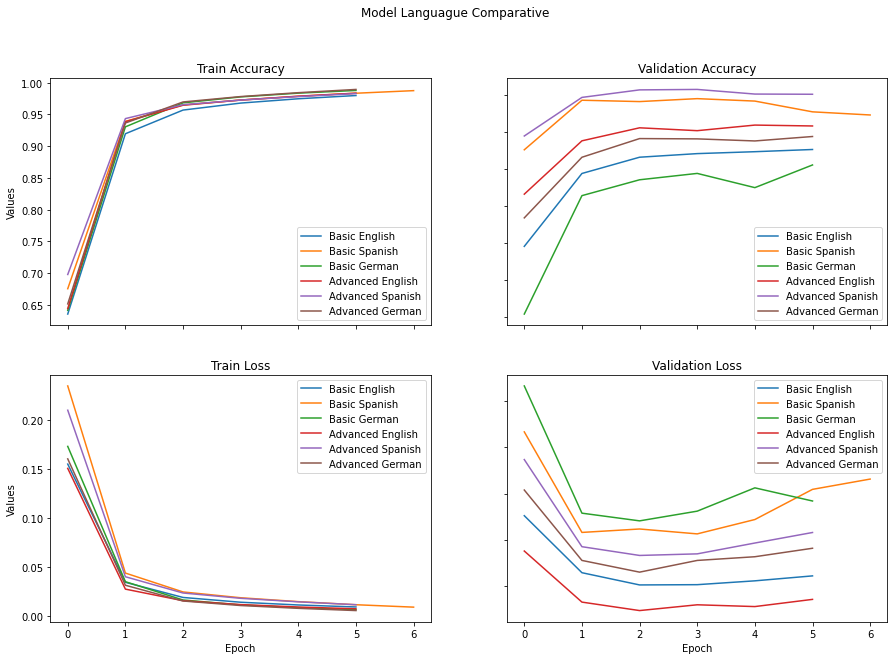

In [32]:
plt.rcParams["figure.figsize"] = (15,10)

# Get the fit history of each model
history_bas_eng=mh_bas_eng.get_history()
history_bas_spa=mh_bas_spa.get_history()
history_bas_ger=mh_bas_ger.get_history()
history_adv_eng=mh_adv_eng.get_history()
history_adv_spa=mh_adv_spa.get_history()
history_adv_ger=mh_adv_ger.get_history()

# summarize history for train accuracy
fig, axs = plt.subplots(2,2)
fig.suptitle('Model Languague Comparative')
axs[0,0].plot(history_bas_eng.history['accuracy'])
axs[0,0].plot(history_bas_spa.history['accuracy'])
axs[0,0].plot(history_bas_ger.history['accuracy'])
axs[0,0].plot(history_adv_eng.history['accuracy'])
axs[0,0].plot(history_adv_spa.history['accuracy'])
axs[0,0].plot(history_adv_ger.history['accuracy'])
axs[0,0].set_title("Train Accuracy")
axs[0,0].legend(['Basic English', 'Basic Spanish', 'Basic German', 'Advanced English', 'Advanced Spanish', 'Advanced German'], loc='lower right')
# summarize history for validation accuracy
axs[0,1].plot(history_bas_eng.history['val_accuracy'])
axs[0,1].plot(history_bas_spa.history['val_accuracy'])
axs[0,1].plot(history_bas_ger.history['val_accuracy'])
axs[0,1].plot(history_adv_eng.history['val_accuracy'])
axs[0,1].plot(history_adv_spa.history['val_accuracy'])
axs[0,1].plot(history_adv_ger.history['val_accuracy'])
axs[0,1].set_title("Validation Accuracy")
axs[0,1].legend(['Basic English', 'Basic Spanish', 'Basic German', 'Advanced English', 'Advanced Spanish', 'Advanced German'], loc='lower right')
# summarize history for train loss
axs[1,0].plot(history_bas_eng.history['loss'])
axs[1,0].plot(history_bas_spa.history['loss'])
axs[1,0].plot(history_bas_ger.history['loss'])
axs[1,0].plot(history_adv_eng.history['loss'])
axs[1,0].plot(history_adv_spa.history['loss'])
axs[1,0].plot(history_adv_ger.history['loss'])
axs[1,0].set_title("Train Loss")
axs[1,0].legend(['Basic English', 'Basic Spanish', 'Basic German', 'Advanced English', 'Advanced Spanish', 'Advanced German'], loc='upper right')
# summarize history for validation loss
axs[1,1].plot(history_bas_eng.history['val_loss'])
axs[1,1].plot(history_bas_spa.history['val_loss'])
axs[1,1].plot(history_bas_ger.history['val_loss'])
axs[1,1].plot(history_adv_eng.history['val_loss'])
axs[1,1].plot(history_adv_spa.history['val_loss'])
axs[1,1].plot(history_adv_ger.history['val_loss'])
axs[1,1].set_title("Validation Loss")
axs[1,1].legend(['Basic English', 'Basic Spanish', 'Basic German', 'Advanced English', 'Advanced Spanish', 'Advanced German'], loc='upper right')


for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Values')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

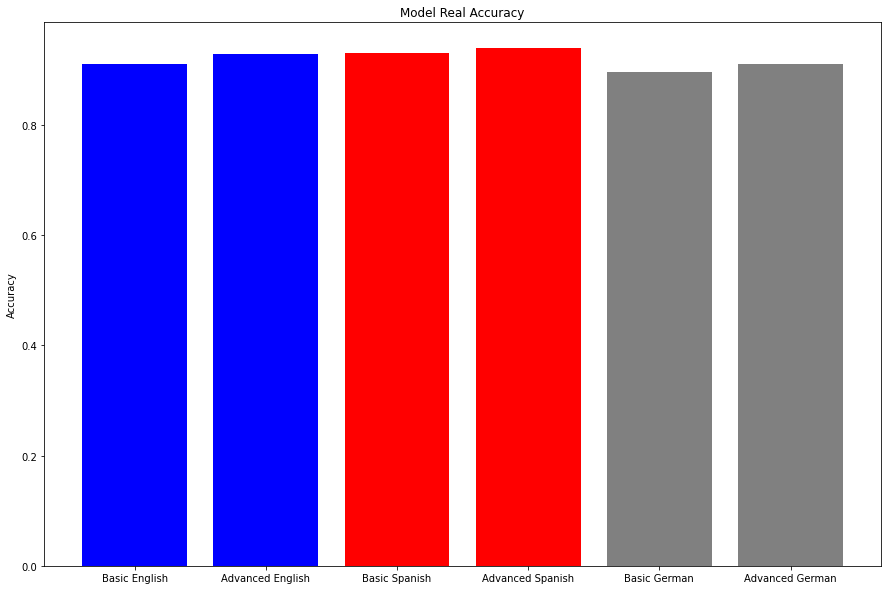

In [33]:
# summarize history for real accuracy

# Divide the correct words for the total to get the percentage
real_acurracy_bas_eng = predict_bas_eng[1]/predict_bas_eng[0]
real_acurracy_bas_spa = predict_bas_spa[1]/predict_bas_spa[0]
real_acurracy_bas_ger = predict_bas_ger[1]/predict_bas_ger[0]
real_acurracy_adv_eng = predict_adv_eng[1]/predict_adv_eng[0]
real_acurracy_adv_spa = predict_adv_spa[1]/predict_adv_spa[0]
real_acurracy_adv_ger = predict_adv_ger[1]/predict_adv_ger[0]

plt.bar(['Basic English','Advanced English','Basic Spanish','Advanced Spanish','Basic German','Advanced German'],[real_acurracy_bas_eng, real_acurracy_adv_eng,real_acurracy_bas_spa, real_acurracy_adv_spa,real_acurracy_bas_ger,   real_acurracy_adv_ger], color=['blue', 'blue', 'red', 'red', 'grey', 'grey'])
plt.title('Model Real Accuracy')
plt.ylabel('Accuracy')
plt.show()